In [1]:
import pandas as pd

In [2]:
# 讀取線上csv file，直接用url
# 這是Kaggle上面的鐵達
df = pd.read_csv('http://bit.ly/kaggletrain')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
# 讀取線上csv file，直接用url，通常有中文要指定編碼
# base_url = "https://data.taipei/api/getDatasetInfo/downloadResource?id={}&rid={}"
# _id = "2f238b4f-1b27-4085-93e9-d684ef0e2735"
# rid = "ea731a84-e4a1-4523-b981-b733beddbc1f"
# csv_url = base_url.format(_id, rid)
# df_raw = pd.read_csv(csv_url, encoding='big5')
# 台北市公開資料有夠慢，自己下載一份放到GD上面，注意Share link要處理一下，把ID拉出來重組
# 參考 https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public
url='https://drive.google.com/file/d/1DZivmKgOfbxf51YEec9s790VSOc0dzLZ/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_raw = pd.read_csv(url, encoding='big5')
print(df_raw.head(10))
# print("columns: ", df_raw.columns)

# 複製一份做處理
df = df_raw.copy()

# 計算不同區不同性別的死亡、受傷人數
# DataFrame.apply(func, axis=0) 用function pre-process
# 把地區的數字部分去掉，join全部非digit的部分
df["區序"] = df["區序"].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

# 組合技巧: 用isin()filter特定value，再用groupby()
df = df[df['性別'].isin([1, 2])].groupby(['區序', '性別'])[['死亡人數', '受傷人數']].sum().sort_values('受傷人數').reset_index()
# df = (df[df['性別'].isin([1, 2])]
#       .groupby(['區序', '性別'])[['死亡人數', '受傷人數']]
#       .sum()
#       .reset_index()
#       .sort_values('受傷人數'))
# print(df)
df['性別'] = df['性別'].apply(lambda x: '男性' if x == 1 else '女性')
df = df.reset_index().drop('index', axis=1)
# df
# # 顯示結果
display(df_raw.head())
display(df.head())

   發生年度  發生月  發生日  發生時-Hours  發生分  處理別-編號     區序                  肇事地點  死亡人數  \
0   108    1    1          0   50       2  12內湖區          內湖區安康路414巷2號     0   
1   108    1    1          0   50       2  12內湖區          內湖區安康路414巷2號     0   
2   108    1    1          0   50       2  12內湖區          內湖區安康路414巷2號     0   
3   108    1    1          1   30       2  09北投區  北投區大度路1段與中央北路2段257巷口     0   
4   108    1    1          1   30       2  09北投區  北投區大度路1段與中央北路2段257巷口     0   
5   108    1    1          1   47       2  03中山區         中山區民生東路2段157號     0   
6   108    1    1          1   47       2  03中山區         中山區民生東路2段157號     0   
7   108    1    1          1   54       1  09北投區          北投區竹子湖路086燈桿     1   
8   108    1    1          1   54       1  09北投區          北投區竹子湖路086燈桿     1   
9   108    1    1          2    5       2  09北投區   北投區竹子湖路20.5K(057燈桿)     0   

   受傷人數  ...   車種 性別  年齡  受傷程度  天候  速限-速度限制  道路型態  事故位置        座標-X       座標-Y  
0     2  ...  B03  1  31   3.0   6    

,發生年度,發生月,發生日,發生時-Hours,發生分,處理別-編號,區序,肇事地點,死亡人數,受傷人數,...,車種,性別,年齡,受傷程度,天候,速限-速度限制,道路型態,事故位置,座標-X,座標-Y
0,108,1,1,0,50,2,12內湖區,內湖區安康路414巷2號,0,2,...,B03,1,31,3.0,6,50,13,9,121.614618,25.066187
1,108,1,1,0,50,2,12內湖區,內湖區安康路414巷2號,0,2,...,C03,2,19,2.0,6,50,13,9,121.614618,25.066187
2,108,1,1,0,50,2,12內湖區,內湖區安康路414巷2號,0,2,...,H02,2,19,2.0,6,50,13,9,121.614618,25.066187
3,108,1,1,1,30,2,09北投區,北投區大度路1段與中央北路2段257巷口,0,1,...,C03,1,20,2.0,7,50,4,1,121.486064,25.122059
4,108,1,1,1,30,2,09北投區,北投區大度路1段與中央北路2段257巷口,0,1,...,C03,2,53,3.0,7,50,4,1,121.486064,25.122059


,區序,性別,死亡人數,受傷人數
0,中山區,女性,0,2
1,松山區,女性,0,2
2,松山區,男性,0,2
3,大安區,女性,0,2
4,信義區,女性,0,4


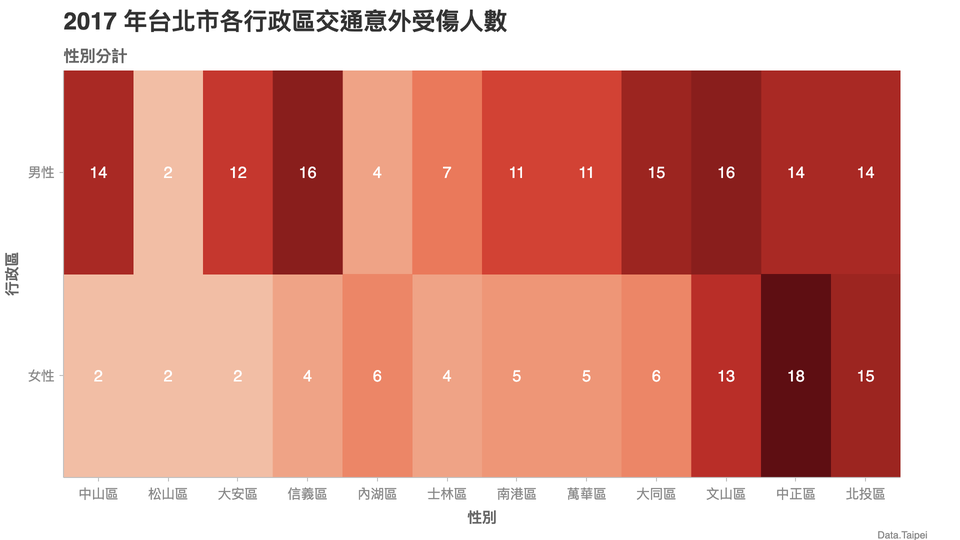

In [7]:
# 用chartify.plot來畫圖
# pip install chartify 安裝package
import chartify
ch = chartify.Chart(
    x_axis_type='categorical', 
    y_axis_type='categorical')

ch.plot.heatmap(
    data_frame=df, 
    y_column='性別', 
    x_column='區序', 
    color_column='受傷人數', 
    text_column='受傷人數', 
    color_palette='Reds', 
    text_format='{:,.0f}')

(ch.set_title('2017 年台北市各行政區交通意外受傷人數')
 .set_subtitle('性別分計')
 .set_source_label("Data.Taipei")
 .axes.set_xaxis_label('性別')
 .axes.set_yaxis_label('行政區')
 .show('png'))